In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, cohen_kappa_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
% matplotlib inline

In [3]:
train = pd.read_csv('tr.csv')
test = pd.read_csv('te.csv')

In [4]:
def into_int(col):
    return df[col].map(lambda x: int(x))

Combine train and test sets

In [5]:
df = pd.concat([train,test],ignore_index=True)

Change '-unknown-' values in the 'gender' column to *NaN*.

In [6]:
df['gender'].replace('-unknown-', np.nan, inplace=True)


In [7]:
df.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                        116866
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked      6085
first_browser                   0
first_device_type               0
gender                     129480
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [8]:
df.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [9]:
sum(df.age > 122), sum(df.age < 18)

(830, 188)

In [10]:
df.loc[df.age < 16, 'age'] = np.nan
df.loc[df.age > 100, 'age'] = np.nan

Drop *NaN* values in 'age' column.

In [11]:
df.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,87mebub9p4,en,Web,0,basic,20091208061105


In [12]:
#df = df[(df['age'] < 100) & (df['age'] > 16)]

In [13]:
df['date_account_created'] = pd.to_datetime(df.loc[:,'date_account_created'])
df['date_first_booking'] = pd.to_datetime(df.loc[:,'date_first_booking'])
df['timestamp_first_active'] = pd.to_datetime(df.loc[:,'timestamp_first_active'], format='%Y%m%d%H%M%S')

In [14]:
categoricals = ['affiliate_channel','affiliate_provider','first_affiliate_tracked','first_browser','first_device_type',
          'gender','language','signup_app','signup_flow','signup_method']
for cat in categoricals:
    df[cat] = df[cat].astype('category')

Comparison between female and male for each country.
-> seems to be no difference

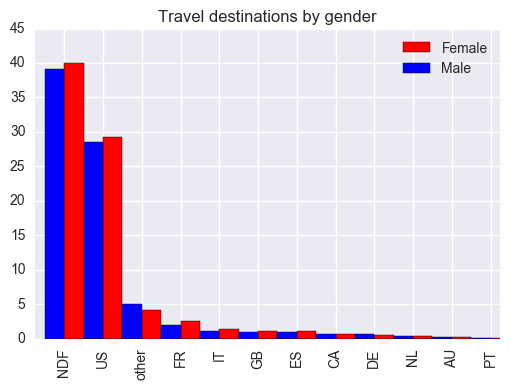

In [15]:
female = sum(df['gender'] == 'FEMALE')
male = sum(df['gender'] == 'MALE')
fem_dest = df.loc[df['gender'] == 'FEMALE', 'country_destination'].value_counts() / female * 100
male_dest = df.loc[df['gender'] == 'MALE', 'country_destination'].value_counts() / male * 100
fem_dest.plot(kind='bar',position=0,color='red', label='Female')
male_dest.plot(kind='bar',position=1,color='blue', label='Male')
plt.title('Travel destinations by gender')
plt.legend()

About 45% did not result in a booking (NDF).

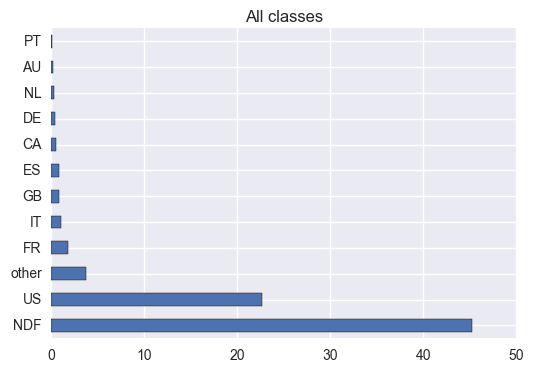

In [58]:
(df.country_destination.value_counts()/len(df)*100).plot(kind='barh')
plt.title('All classes')

In [27]:
df.country_destination.value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

/Users/flowinger/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


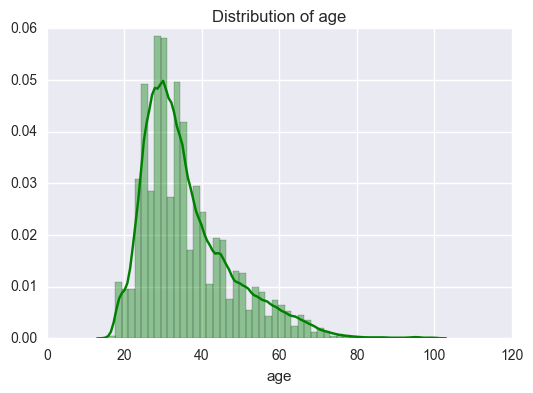

In [17]:
sns.distplot(df.age.dropna(),color='green')
plt.title('Distribution of age')

96% of users have English as their prior language.

In [18]:
len(df[df.language == 'en'])/len(df)*100

96.3675888323952

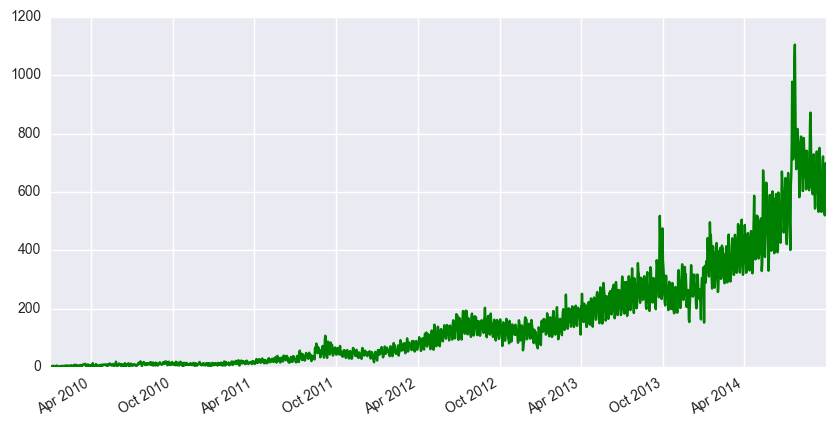

In [19]:
plt.figure(figsize=(10,5))
df.date_account_created.value_counts().plot(kind='line', color='green')

In [53]:
df.country_destination.unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU', nan], dtype=object)

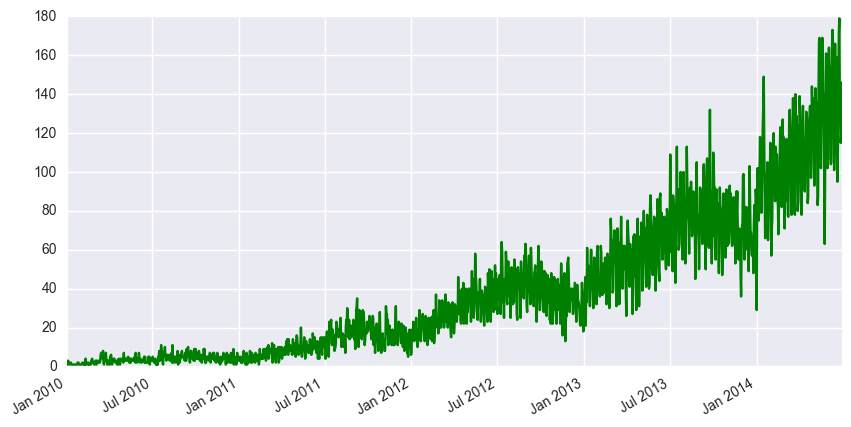

In [46]:
plt.figure(figsize=(10,5))
df[df['country_destination'] == 'US'].date_account_created.value_counts().plot(kind='line', color='green')

Plot by week days.

In [20]:
days = []
weekly = [days.append(i.weekday()) for i in df['date_account_created']]
weekly = pd.Series(days)

([<matplotlib.axis.XTick at 0x11116ca58>,
 <a list of 7 Text xticklabel objects>)

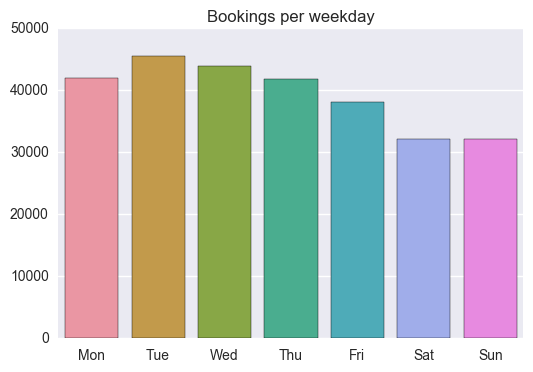

In [23]:
sns.barplot(weekly.value_counts().index,weekly.value_counts(),order=range(7))
sns.despine()
plt.title('Bookings per weekday')
plt.xticks(range(7),('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))

Explore rest of the features:

In [21]:
df.affiliate_channel.value_counts()

direct           181571
sem-brand         36439
sem-non-brand     20075
seo               14362
other              9547
api                8167
content            4118
remarketing        1268
Name: affiliate_channel, dtype: int64

Group other, api, content, remarketing.

In [22]:
df['affiliate_channel'] = df['affiliate_channel'].map(lambda x: 'other' if x in ['remarketing','content','api'] else x)

In [23]:
df.affiliate_provider.value_counts()

direct                 181270
google                  65956
other                   13036
facebook                 3996
bing                     3719
craigslist               3475
padmapper                 836
vast                      830
yahoo                     653
facebook-open-graph       566
gsp                       455
meetup                    358
email-marketing           270
naver                      66
baidu                      32
yandex                     18
wayn                        8
daum                        3
Name: affiliate_provider, dtype: int64

Group non-significant providers as 'other'.

In [24]:
df['affiliate_provider'] = df['affiliate_provider'].map(lambda x: 'other' if x in ['naver','baidu','yandex','wayn','daum','email-marketing','meetup','gsp','facebook-open-graph','yahoo','vast','padmapper'] else x)

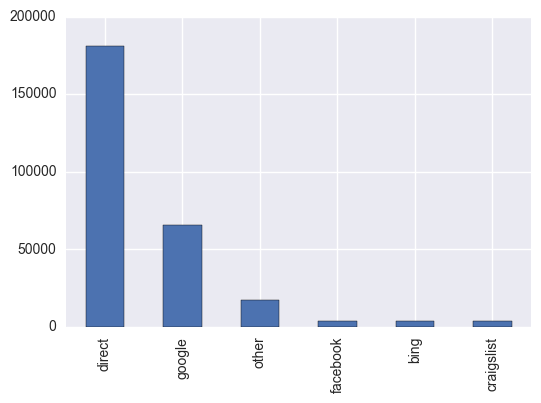

In [25]:
df.affiliate_provider.value_counts().plot(kind='bar')

In [26]:
df.first_affiliate_tracked.value_counts()

untracked        143181
linked            62064
omg               54859
tracked-other      6655
product            2353
marketing           281
local ops            69
Name: first_affiliate_tracked, dtype: int64

Group non-significant categories as 'other'.

In [27]:
df['first_affiliate_tracked'] = df['first_affiliate_tracked'].map(lambda x: 'other' if x in ['product','tracked-other','marketing','local ops'] else x)


In [28]:
df.first_browser.value_counts()

Chrome                  78671
Safari                  53302
-unknown-               44394
Firefox                 38665
Mobile Safari           29636
IE                      24744
Chrome Mobile            3186
Android Browser          1577
AOL Explorer              254
Opera                     228
Silk                      172
IE Mobile                 118
BlackBerry Browser         89
Chromium                   83
Mobile Firefox             64
Maxthon                    60
Apple Mail                 45
Sogou Explorer             43
SiteKiosk                  27
Iron                       24
RockMelt                   24
IceWeasel                  14
Yandex.Browser             14
Pale Moon                  13
CometBird                  12
SeaMonkey                  12
Camino                      9
Opera Mini                  8
TenFourFox                  8
wOSBrowser                  7
CoolNovo                    6
Avant Browser               4
Opera Mobile                4
Mozilla   

Group non-significant browsers as 'other'.

In [29]:
df['first_browser'] = df['first_browser'].map(lambda x: 'other' if x not in ['Chrome','Safari','-unknown-','Firefox',
                                                                             'Mobile Safari','IE','Chrome Mobile',
                                                                            'Android Browser'] else x)

In [30]:
df['first_browser'] = df['first_browser'].map(lambda x: np.nan if x == '-unknown-' else x)

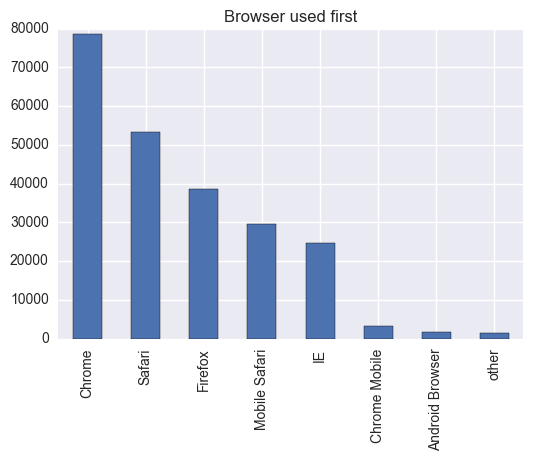

In [31]:
df.first_browser.value_counts().plot(kind='bar')
plt.title('Browser used first')

In [32]:
df.first_device_type.value_counts()

Mac Desktop           106328
Windows Desktop        86948
iPhone                 39814
iPad                   18036
Other/Unknown          11167
Android Phone           9458
Android Tablet          2098
Desktop (Other)         1507
SmartPhone (Other)       191
Name: first_device_type, dtype: int64

Group in Mobile, Desktop and Other.

In [25]:
df['first_device_type'] = df['first_device_type'].map(lambda x: 'other' if x in ['Other/Unknown','SmartPhone (Other)'] else x)
df['first_device_type'] = df['first_device_type'].map(lambda x: 'Desktop' if x in ['Mac Desktop','Windows Desktop','Desktop (Other)'] else x)
df['first_device_type'] = df['first_device_type'].map(lambda x: 'Mobile' if x in ['iPhone','Android Phone','iPad','Android Tablet'] else x)

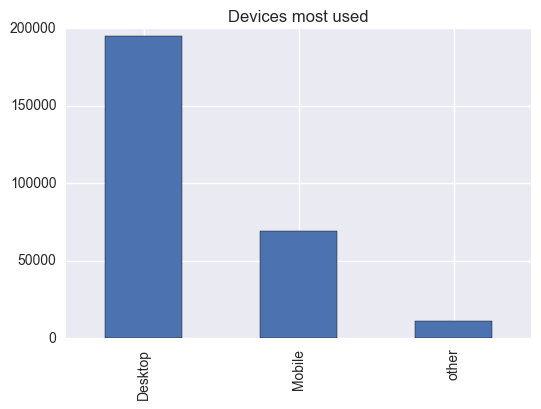

In [26]:
df.first_device_type.value_counts().plot(kind='bar')
plt.title('Devices most used')

In [35]:
df.gender.value_counts()

FEMALE    77524
MALE      68209
OTHER       334
Name: gender, dtype: int64

In [36]:
len(df),len(df.country_destination.dropna())

(275547, 213451)

In [37]:
df.signup_method.value_counts()

basic       198222
facebook     74864
google        2438
weibo           23
Name: signup_method, dtype: int64

In [38]:
df['signup_method'] = df['signup_method'].map(lambda x: 'other' if x in ['facebook','google','weibo'] else x)

In [41]:
sessions = pd.read_csv('sessions_grouped.csv')

In [ ]:
s2 = sessions.groupby('user_id').agg(['count']).loc[:,'ratio'].reset_index()
#s2.to_csv('sessions_edit.csv',index=False)
sessions[sessions['action_detail'] == 'your_trips']
sessions

In [86]:
trips = pd.read_csv('your_trips.csv')
search = pd.read_csv('search_results.csv')
user_profile = pd.read_csv('user_profile.csv')
p5 = pd.read_csv('p5.csv')
update_listing = pd.read_csv('update_listing.csv')
bookings = pd.read_csv('booking_requests.csv')

In [93]:
len(search),len(user_profile),len(update_listing),len(bookings),len(trips),len(p5)


(87640, 57547, 31675, 17856, 14527, 11883)

Combine all action columns in one data frame.

In [94]:
search = search.rename(columns={'action_view_trips':'action_search'})
trips = trips.rename(columns={'count':'action_view_trips'})
user_profile = user_profile.rename(columns={'count':'action_user_profile'})
p5 = p5.rename(columns={'count':'action_p5'})
update_listing = update_listing.rename(columns={'count':'action_update_listing'})
bookings = bookings.rename(columns={'count':'action_booking_requests'})


In [141]:
df = df.rename(columns={'id':'user_id'})

In [123]:
search = search.groupby('user_id').agg('sum').reset_index()

In [144]:
combined = search.set_index('user_id').join(user_profile).set_index('user_id').reset_index()
first_merge = df.merge(search,on='user_id',how='left')
sec_merge = first_merge.merge(user_profile,on='user_id',how='left')
third_merge = sec_merge.merge(update_listing,on='user_id',how='left')
fourth_merge = third_merge.merge(bookings,on='user_id',how='left')
fifth_merge = fourth_merge.merge(trips,on='user_id',how='left')
sixth_merge = fifth_merge.merge(p5,on='user_id',how='left')

In [79]:
combined.fillna(0,inplace=True)

In [81]:
combined.action_view_trips = combined.action_view_trips.map(lambda x: int(x))

In [118]:
merged = df.merge(combined,left_on='id',right_on='user_id',how='left')

# Modelling

In [14]:
def scores(ypred, ytest, xtest):
    s = ['Precision','Recall','F1']
    prec = precision_score(ytest,ypred,average='weighted')
    rec = recall_score(ytest,ypred,average='weighted')
    f1 = f1_score(ytest,ypred,average='weighted')
    return sorted(list(zip(s,[prec,rec,f1])))
#cross_val_score(xgb,X,y,cv=3,scoring='precision_weighted')

In [3]:
df = pd.read_csv('airbnb_0513_1226.csv')
df_ext = pd.read_csv('airbnb_dfext1.csv')
df_ext3 = pd.read_csv('airbnb_0513_2306.csv')

/Users/flowinger/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df['action_booking_requests'] = df['action_booking_requests'].fillna(0).map(lambda x: int(x))
df['action_p5'] = df['action_p5'].fillna(0).map(lambda x: int(x))
df['action_search'] = df['action_search'].fillna(0).map(lambda x: int(x))
df['action_update_listing'] = df['action_update_listing'].fillna(0).map(lambda x: int(x))
df['action_user_profile'] = df['action_user_profile'].fillna(0).map(lambda x: int(x))
df['action_view_trips'] = df['action_view_trips'].fillna(0).map(lambda x: int(x))


#### Create date features

In [5]:
#df_ext3['booking_month'] = df_ext3['date_first_booking'].map(lambda x: pd.to_datetime(x).date().month)
#df_ext3['account_month'] = df_ext3['date_account_created'].map(lambda x: pd.to_datetime(x).date().month)
#df_ext3['timestamp_month'] = df_ext3['timestamp_first_active'].map(lambda x: pd.to_datetime(x).date().month)
#df_ext3['booking_year'] = df_ext3['date_first_booking'].map(lambda x: pd.to_datetime(x).date().year)
#df_ext3['account_year'] = df_ext3['date_account_created'].map(lambda x: pd.to_datetime(x).date().year)
#df_ext3['timestamp_year'] = df_ext3['timestamp_first_active'].map(lambda x: pd.to_datetime(x).date().year)
#df_ext3['booking_day'] = df_ext3['date_first_booking'].map(lambda x: pd.to_datetime(x).date().day)
#df_ext3['account_day'] = df_ext3['date_account_created'].map(lambda x: pd.to_datetime(x).date().day)
#df_ext3['timestamp_day'] = df_ext3['timestamp_first_active'].map(lambda x: pd.to_datetime(x).date().day)

In [ ]:
df_ext3 = pd.get_dummies(df_ext3,columns=['affiliate_channel','affiliate_provider','signup_method',
                                   'first_affiliate_tracked'])

In [ ]:
# df_ext2 + action numerics
metrics = pd.read_csv('action_numerics.csv')


In [6]:
df_ext3.country_destination.unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

In [7]:
df_ext3.head()

,age,country_destination,date_account_created,date_first_booking,first_browser,gender,user_id,language,signup_app,signup_flow,...,first_affiliate_tracked_omg,first_affiliate_tracked_other,first_affiliate_tracked_untracked,timestamp_month,booking_year,account_year,timestamp_year,booking_day,account_day,timestamp_day
0,NaN,NDF,2010-06-28,NaN,Chrome,NaN,gxn3p5htnn,en,Web,0,...,0,0,1,3,NaN,2010,2009,NaN,28,19
1,38.0,NDF,2011-05-25,NaN,Chrome,1.0,820tgsjxq7,en,Web,0,...,0,0,1,5,NaN,2011,2009,NaN,25,23
2,56.0,US,2010-09-28,2010-08-02,IE,0.0,4ft3gnwmtx,en,Web,3,...,0,0,1,6,2010.0,2010,2009,2.0,28,9
3,42.0,other,2011-12-05,2012-09-08,Firefox,0.0,bjjt8pjhuk,en,Web,0,...,0,0,1,10,2012.0,2011,2009,8.0,5,31
4,41.0,US,2010-09-14,2010-02-18,Chrome,NaN,87mebub9p4,en,Web,0,...,0,0,1,12,2010.0,2010,2009,18.0,14,8


In [8]:
cols1 = ['action_search', 'action_user_profile', 'action_update_listing','action_booking_requests', 
        'action_view_trips', 'action_p5', 'age']
cols2 = ['action_search', 'action_user_profile', 'action_update_listing','action_booking_requests', 
        'action_view_trips', 'action_p5', 'age','first_device_type_Desktop', 'first_device_type_Mobile',
         'first_device_type_other', 'signup_method_basic','signup_method_other']
# threw signup meth other, first device Mobile out
cols3 = ['action_search', 'action_user_profile', 'action_update_listing','action_booking_requests', 
        'action_view_trips', 'action_p5', 'age','first_device_type_Desktop',
         'first_device_type_other', 'signup_method_basic','signup_flow']
cols4 = ['action_search', 'action_user_profile', 'action_update_listing','action_booking_requests', 
        'action_view_trips', 'action_p5', 'age','first_device_type_Desktop',
         'first_device_type_other', 'signup_method_basic','signup_flow',
         'affiliate_channel_direct', 'affiliate_channel_other',
         'affiliate_channel_sem-brand', 'affiliate_channel_sem-non-brand',
       'affiliate_channel_seo', 'affiliate_provider_bing',
       'affiliate_provider_craigslist', 'affiliate_provider_direct',
       'affiliate_provider_facebook', 'affiliate_provider_google',
       'affiliate_provider_other', 'first_affiliate_tracked_linked',
       'first_affiliate_tracked_omg', 'first_affiliate_tracked_other',
       'first_affiliate_tracked_untracked']
cols5 = ['action_search', 'action_user_profile', 'action_update_listing','action_booking_requests', 
        'action_view_trips', 'action_p5', 'age','signup_flow','affiliate_channel_other',
        'affiliate_channel_sem-non-brand','booking_month','gender','timestamp_month']
cols6 = ['action_search', 'action_user_profile', 'action_update_listing','action_booking_requests', 
        'action_view_trips', 'action_p5', 'age','signup_method_basic','signup_flow',
          'affiliate_channel_other', 'affiliate_channel_sem-non-brand','first_affiliate_tracked_other',
       'booking_month','sum','avg']
cols7 = ['action_search', 'action_user_profile', 'action_update_listing','action_booking_requests', 
        'action_p5', 'age','signup_flow','affiliate_channel_other',
        'affiliate_channel_sem-non-brand','booking_month','gender','timestamp_month',
        'booking_year','account_year', 'booking_day', 'account_day','timestamp_day','sum','avg']
cols8 = ['age', 'gender','signup_flow', 'action_search','action_user_profile', 'action_update_listing',
       'action_booking_requests', 'action_view_trips', 'action_p5',
       'count','stddev', 'max', 'booking_month',
       'account_month','affiliate_provider_craigslist','timestamp_month', 'booking_year',
       'account_year', 'booking_day', 'account_day']
cols9 = ['age', 'gender','signup_flow', 'action_search','action_user_profile', 'action_update_listing',
       'action_booking_requests', 'action_p5',
       'count','max',
       'affiliate_provider_craigslist','timestamp_month', 'booking_year',
         'booking_day']
cols10 = ['age', 'gender','signup_flow', 'action_search','action_user_profile', 'action_update_listing',
       'action_booking_requests', 'action_p5',
       'count','max',
       'affiliate_provider_craigslist','account_month', 'account_year',
         'account_day']
cols11 = ['age','gender', 'signup_flow', 'action_search',
       'action_update_listing',
       'action_booking_requests', 'action_view_trips', 'action_p5',
       'first_device_type_Desktop',
       'first_device_type_other', 'signup_method_basic',
       'count', 'sum', 'stddev', 'max','affiliate_channel_other','affiliate_channel_sem-non-brand',
       'affiliate_provider_facebook',
       'first_affiliate_tracked_omg',
       'first_affiliate_tracked_untracked', 'timestamp_month',
       'account_year', 'timestamp_year', 'sumcount']

In [10]:
df4 = pd.read_csv('final.csv')

In [11]:
X = df4.loc[:,cols11]
y = df4.loc[:,'country_destination']

In [ ]:
df4['country_destination'] = df4['country_destination'].map(lambda x: 0 if x == 'NDF' else 1)

XGBoost

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
xgb.score(X_test,y_test)

0.64640711554966057

In [13]:
sorted(list(zip(xgb.feature_importances_,X.columns)),reverse=True)

[(0.21155983, 'age'),
 (0.081758678, 'timestamp_month'),
 (0.068420403, 'action_p5'),
 (0.057922687, 'signup_flow'),
 (0.050883044, 'gender'),
 (0.049524516, 'signup_method_basic'),
 (0.047795478, 'stddev'),
 (0.044831418, 'account_year'),
 (0.044213906, 'sum'),
 (0.039150301, 'max'),
 (0.037915278, 'action_search'),
 (0.036556751, 'affiliate_channel_other'),
 (0.035445228, 'sumcount'),
 (0.033716191, 'action_update_listing'),
 (0.030134618, 'count'),
 (0.026429541, 'first_device_type_Desktop'),
 (0.022724466, 'action_booking_requests'),
 (0.014449797, 'action_view_trips'),
 (0.013708781, 'first_device_type_other'),
 (0.012350253, 'timestamp_year'),
 (0.012103248, 'first_affiliate_tracked_untracked'),
 (0.010744721, 'affiliate_channel_sem-non-brand'),
 (0.010374213, 'affiliate_provider_facebook'),
 (0.0072866492, 'first_affiliate_tracked_omg')]